In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from prettytable import PrettyTable

In [7]:
def plot_loss(vae_loss, iwae_loss, output_file, title, save_fig):
    plt.plot(range(1,len(vae_loss)+1), vae_loss, label=f"VAE (min: {min(vae_loss):.2f})")
    plt.plot(range(1,len(iwae_loss)+1), iwae_loss, label=f"IWAE (min: {min(iwae_loss):.2f})")
    plt.title(title)
    plt.legend()
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    #plt.ylim([80,180])
    plt.grid()
    if save_fig:
        plt.savefig("plots/"+output_file)
    plt.show()

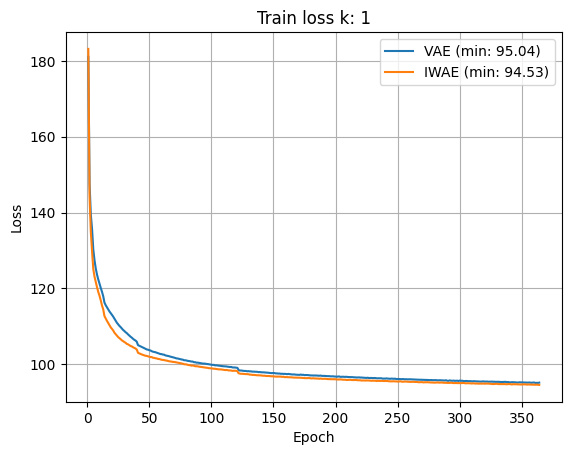

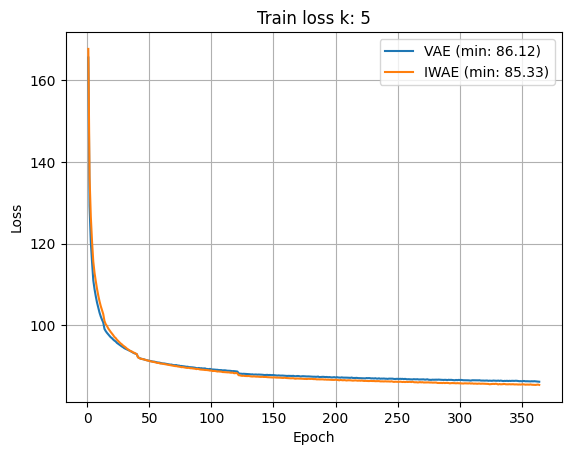

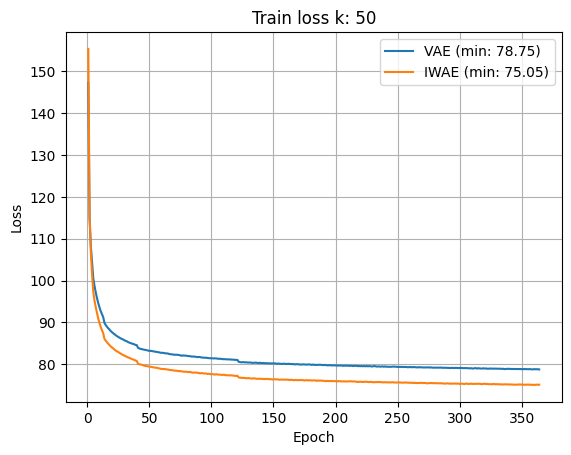

In [8]:
for k in [1,5,50]:
    vae_file = f"outputs/MNIST/L2/k{k}_vae_train_loss.pt"
    iwae_file = f"outputs/MNIST/L2/k{k}_iwae_train_loss.pt"
    title = f"Train loss k: {k}"
    output_file = f"k{k}_loss.png"

    vae_loss = torch.load(vae_file).numpy()
    iwae_loss = torch.load(iwae_file).numpy()

    plot_loss(vae_loss, iwae_loss, output_file, title, False)

In [6]:
table = PrettyTable(["k", "VAE", "IWAE"])
for k in [1,5,50]:
    vae_file = f"outputs/MNIST/L2/k{k}_vae_eval_nll.pt"
    iwae_file = f"outputs/MNIST/L2/k{k}_iwae_eval_nll.pt"

    vae_eval = torch.load(vae_file)
    iwae_eval = torch.load(iwae_file)
    table.add_row([k, f"{vae_eval:.2f}", f"{iwae_eval:.2f}"])

print(table)


+----+-------+-------+
| k  |  VAE  |  IWAE |
+----+-------+-------+
| 1  | 81.49 | 77.59 |
| 5  | 79.50 | 76.51 |
| 50 | 78.61 | 74.90 |
+----+-------+-------+
